In [1]:
from PIL import *
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

c:\program files\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\program files\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


# on va dabord creer la matrice des images

In [34]:
path='C:\\Users\\Achille\\Desktop\\cours_A4\\projetcell\\Stacks\\stack2\\'

In [35]:
img = Image.open( path+'stack2_T0.tif')
x=np.array(img)
x=np.array([x])
for a in range(1,55): 
    img = Image.open( path+'stack2_T'+str(a)+'0.tif')
    x2=np.array(img)
    x=np.concatenate((x,[x2]),axis=0)
    

In [36]:
x.shape

(55, 1352, 1688)

# puis on va charger la matrice convertie des Y

In [32]:
y=np.load('Y_convertie2.npy')

on va grossir les points

In [37]:
for i in range(55):
    print(i)
    for j in range(1352):
        for k in range(1688):
            if y[i][j][k]==1:
                y[i][j-12:j,k-12:k]=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [38]:
y.shape #pas la bonne shape....

(56, 1352, 1688)

In [22]:
#on va donc rotate la matrice (plus besoin)
#y=np.rot90(y,k=1,axes=(1,2))

In [23]:
y.shape #parfait!

(55, 1352, 1688)

on compare pour la forme

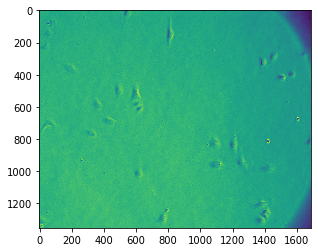

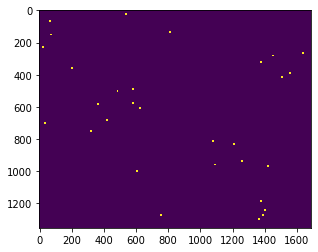

In [39]:
plt.imshow(x[10])
plt.show()
plt.imshow(y[10])
plt.show()

# on va crop et save

In [40]:
size=512
xreturn=[]
yreturn=[]
for i in range(len(x)):
    X=size
    
    while X<1352:
        Y=size
        while Y<1688:
            xreturn.append(x[i][X-size:X,Y-size:Y])
            yreturn.append(y[i][X-size:X,Y-size:Y])
            Y=Y+size
        X=X+size
    

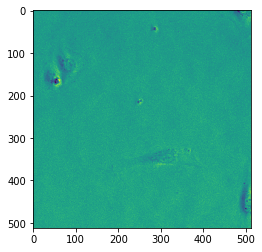

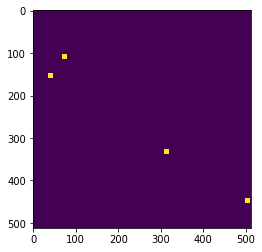

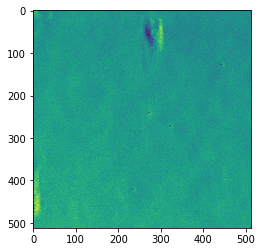

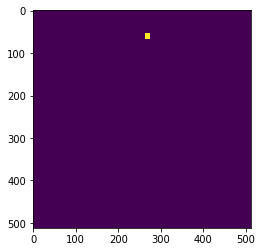

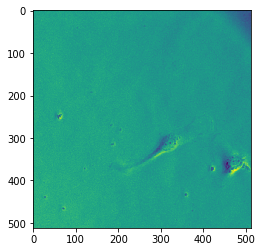

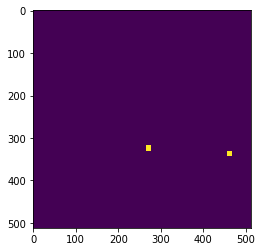

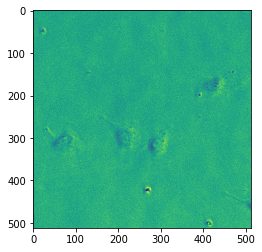

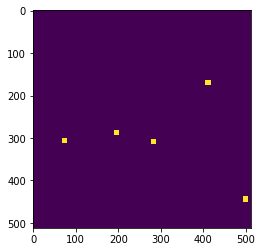

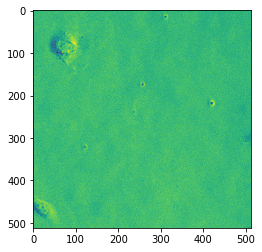

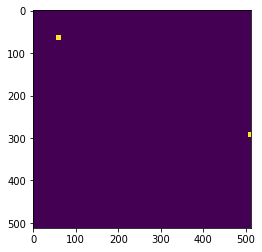

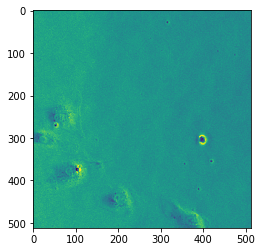

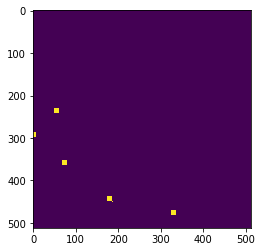

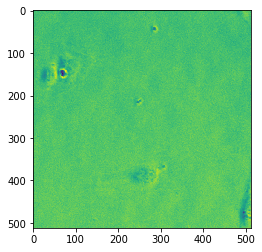

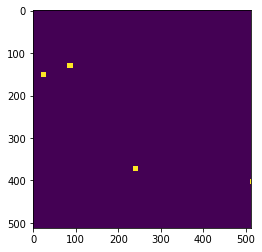

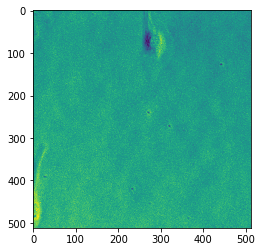

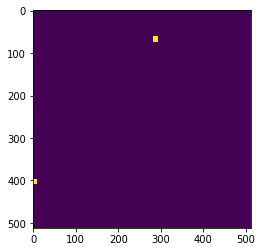

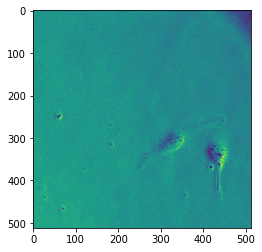

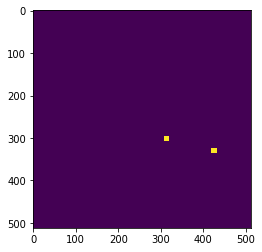

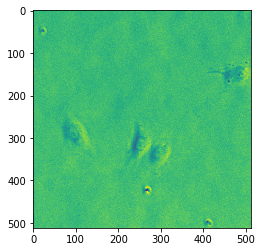

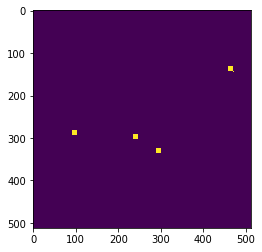

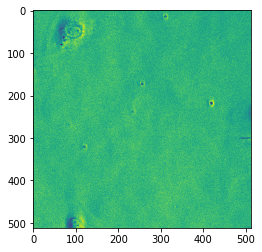

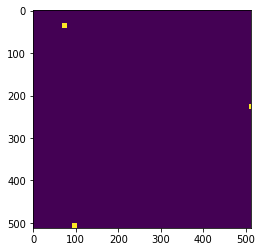

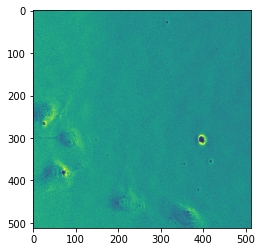

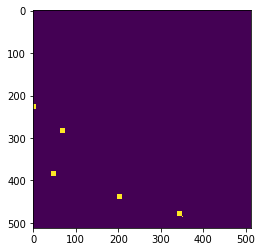

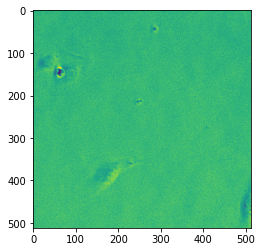

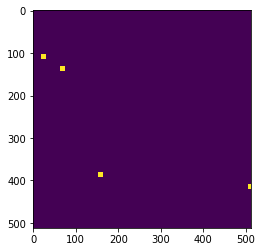

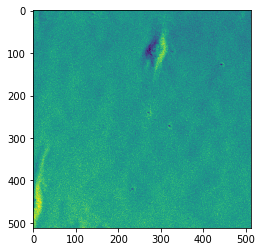

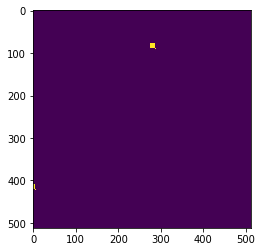

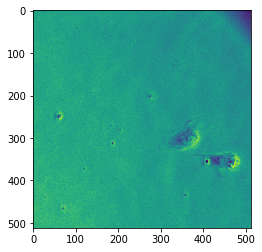

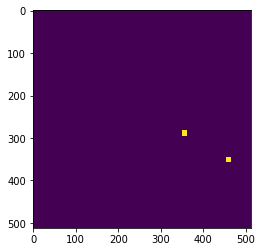

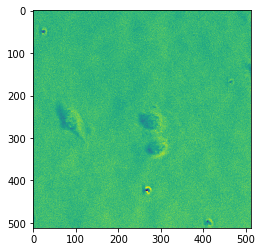

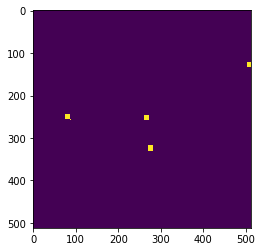

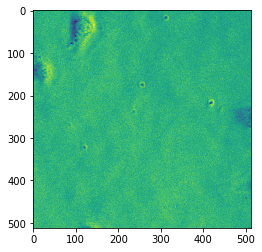

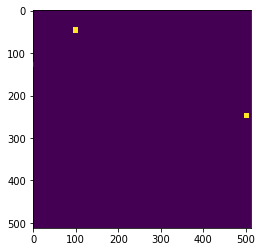

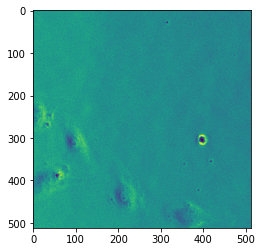

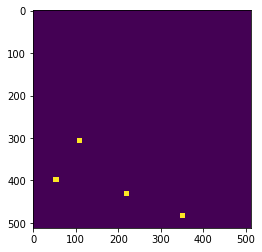

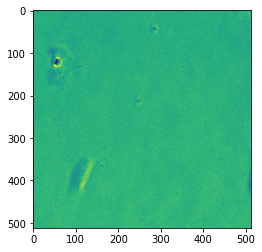

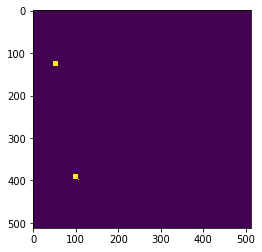

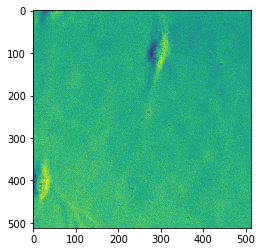

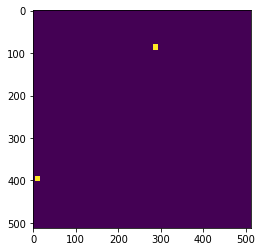

In [41]:
for i in range(20):
    plt.imshow(xreturn[i])
    plt.show()
    plt.imshow(yreturn[i])

    plt.show()


In [42]:
np.save("X_stack2_512.npy",xreturn)
np.save("Y_stack2_512.npy",yreturn)

In [3]:
A=np.array([[0,0,0],[0,0,0],[0,0,0]])

In [6]:
A[0:2,0:2]=1

In [7]:
A

array([[1, 1, 0],
       [1, 1, 0],
       [0, 0, 0]])

In [8]:
A=np.load("X_stack2_512.npy")
B=np.load("X_stack1_512.npy")

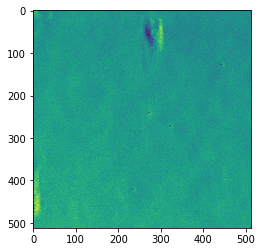

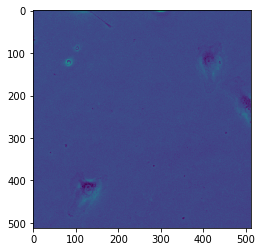

In [9]:
plt.imshow(A[1])
plt.show()
plt.imshow(B[1])
plt.show()

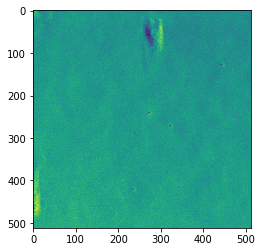

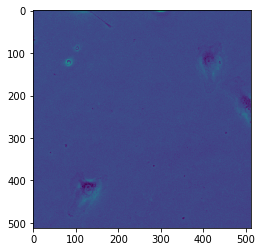

In [11]:
plt.imshow(A[1]/np.mean(A[1]))
plt.show()
plt.imshow(B[1]/np.mean(B[1]))
plt.show()

181.66517639160156 70.89766693115234
-120.0 70.89766693115234


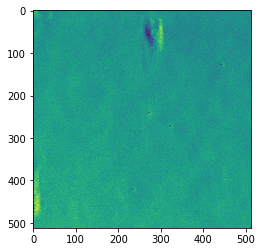

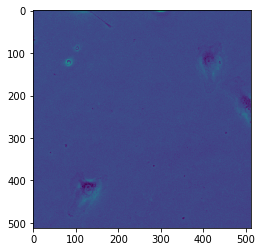

-123.66517639160156
-234.89766693115234


In [33]:
a=A[1]
b=B[1]
am=np.mean(a)
bm=np.mean(b)
print(am,bm)

a=a-am
b=b-bm

a=a-(np.max(a)-np.min(a))
b=b-(np.max(b)-np.min(b))

print(np.mean(a),bm)
plt.imshow(a)
plt.show()
plt.imshow(b)
plt.show()
print(a[300][300])
print(b[300][300])